In [76]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import datetime 
from dateutil.relativedelta import relativedelta
import pytz
import json
import numpy as np

In [58]:
start_year = 1995

tz = pytz.timezone('America/New_York')

date = datetime.datetime(year=start_year, month=1, day=1, tzinfo = tz)
start_date = datetime.datetime(year=start_year, month=1, day=1)
start_date

datetime.datetime(1995, 1, 1, 0, 0)

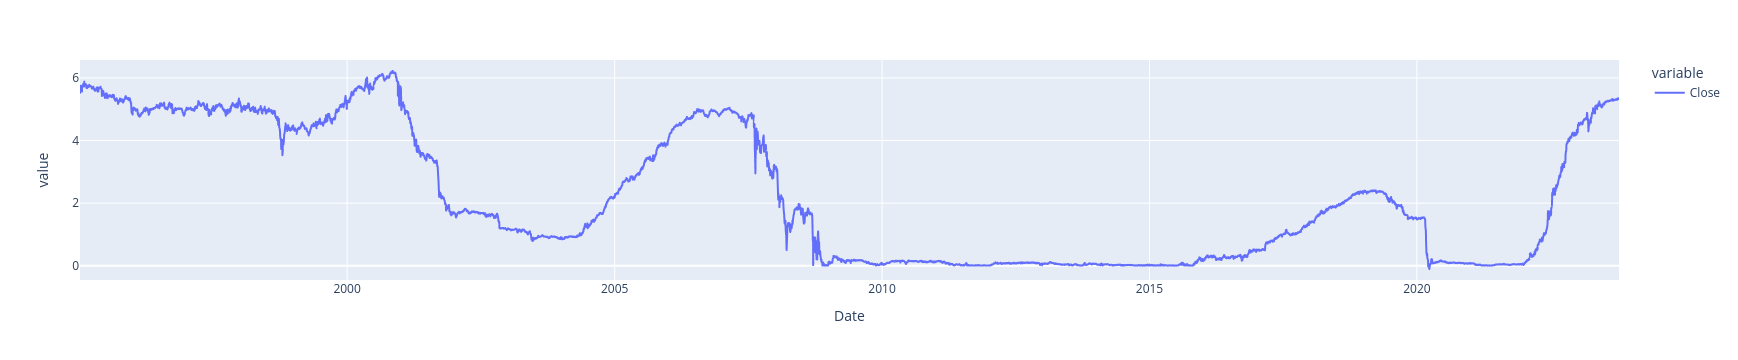

In [3]:
IRX = yf.Ticker('^IRX')
IRX_hist = IRX.history(start=start_date)['Close'].reset_index()
px.line(IRX.history(start=start_date)['Close'])

In [70]:
df = pd.read_csv('./constituents.csv')

companies_throughout = []
companies_to_eliminate = []

for i in range(len(df['Symbol'])):
    row = df.iloc[i]
    try:
        added_date = datetime.datetime.strptime(row['Date added'], "%Y-%m-%d")
        if added_date > start_date:
            companies_to_eliminate += [row['Symbol']]
        else:
            #print(added_date)
            companies_throughout += [row['Symbol']]
    except Exception as e:
        companies_to_eliminate += [row['Symbol']]
        continue


#companies_throughout
#companies_to_eliminate

In [5]:
new_df = df.set_index('Symbol').drop(labels=companies_to_eliminate)
new_df

Security       GICS Sector  \
Symbol                                                 
MMM                             3M       Industrials   
ABT                         Abbott       Health Care   
ADM                            ADM  Consumer Staples   
ADP                            ADP       Industrials   
APD     Air Products and Chemicals         Materials   
...                            ...               ...   
WFC                    Wells Fargo        Financials   
WRK                       WestRock         Materials   
WMB             Williams Companies            Energy   
GWW                 W. W. Grainger       Industrials   
XEL                    Xcel Energy         Utilities   

                                     GICS Sub-Industry  \
Symbol                                                   
MMM                           Industrial Conglomerates   
ABT                              Health Care Equipment   
ADM                   Agricultural Products & Services   
ADP               Human Resource & Employment Services   
APD                                   Industrial Gases   
...                                                ...   
WFC                                  Diversified Banks   
WRK     Paper & Plastic Packaging Products & Materials   
WMB                 Oil & Gas Storage & Transportation   
GWW       Industrial Machinery & Supplies & Components   
XEL                                    Multi-Utilities   

            Headquarters Location  Date added      CIK Founded  
Symbol                                                          
MMM         Saint Paul, Minnesota  1957-03-04    66740    1902  
ABT       North Chicago, Illinois  1957-03-04     1800    1888  
ADM             Chicago, Illinois  1957-03-04     7084    1902  
ADP          Roseland, New Jersey  1981-03-31     8670    1949  
APD       Allentown, Pennsylvania  1985-04-30     2969    1940  
...                           ...         ...      ...     ...  
WFC     San Francisco, California  1976-06-30    72971    1852  
WRK              Atlanta, Georgia  1957-03-04  1732845    2015  
WMB               Tulsa, Oklahoma  1975-03-31   107263    1908  
GWW         Lake Forest, Illinois  1981-06-30   277135    1927  
XEL        Minneapolis, Minnesota  1957-03-04    72903    1909  

[140 rows x 7 columns]

In [28]:
quarters = {}
quarter_dates  = []
year = start_year
date = datetime.datetime(year=start_year, month=1, day=1, tzinfo = tz)

while year <= 2023:
    quarters[year] = {} 
    for i in range(4):
        quarters[year][f'Q{i+1}'] = {}
        quarter_dates += [date+relativedelta(months=3*i)]
        quarters[year][f'Q{i+1}']['start'] = date+relativedelta(months=3*(i))
        quarters[year][f'Q{i+1}']['end']  = date+relativedelta(months=3*(i+1))-datetime.timedelta(days=1)
    year += 1
    date += relativedelta(years=1)
#quarters

In [35]:
quarters_list = json.load(open('./quarters_list.json', 'r'))
#quarters_list

In [38]:
quarterly_RFR = {}

quarterly_rfr_df = pd.DataFrame(columns=['avg_rfr'], index=quarters_list)

for year in quarters:
    quarterly_RFR[year] = {}
    for quarter in quarters[year]:
        quarter_start_date = quarters[year][quarter]['start']
        quarter_end_date = quarters[year][quarter]['end']
        mask = (IRX_hist['Date'] >= quarter_start_date) & (IRX_hist['Date'] < quarter_end_date)
        quarter_rff = IRX_hist.loc[mask]
        mean = quarter_rff['Close'].mean()
        quarterly_RFR[year][quarter] = mean
        quarterly_rfr_df['avg_rfr'][f'{year}-{quarter}'] = mean


quarterly_rfr_df.to_csv('./quarterly_rfr.csv')

In [36]:
px.line(quarterly_rfr_df)

avg_rfr
1995-Q1  5.725806
1995-Q2  5.587936
1995-Q3  5.360317
1995-Q4  5.256129
1996-Q1  4.927903
...           ...
2022-Q4  3.988762
2023-Q1  4.593581
2023-Q2  5.037274
2023-Q3  5.273238
2023-Q4  5.333778

[116 rows x 1 columns]

In [13]:
returns = {}
dates = IRX_hist.reset_index()['Date']

'''all_prices = pd.DataFrame(0, index=dates, columns=companies_throughout)

for company in companies_throughout:
    #print(company)
    ticker = yf.Ticker(company)
    closing_prices = ticker.history(start=start_date)['Close']
    #print(closing_prices)
    all_prices[company] = closing_prices

all_prices'''
all_prices = pd.read_csv('./all_companies_hist_prices.csv')


Date        MMM        ABT        ADM         ADP  \
0     1995-01-03 00:00:00-05:00  11.936721   3.883655   8.014091    6.739652   
1     1995-01-04 00:00:00-05:00  11.798571   3.883655   8.063561    6.710848   
2     1995-01-05 00:00:00-05:00  11.798571   3.854006   7.964614    6.754051   
3     1995-01-06 00:00:00-05:00  11.743310   3.794714   7.865682    6.754051   
4     1995-01-09 00:00:00-05:00  11.743310   3.787555   7.865682    6.754051   
...                         ...        ...        ...        ...         ...   
7223  2023-10-06 00:00:00-04:00  88.400002  96.879997  72.860001  246.380005   
7224  2023-10-09 00:00:00-04:00  89.050003  96.760002  73.900002  250.179993   
7225  2023-10-10 00:00:00-04:00  90.639999  97.559998  74.150002  249.149994   
7226  2023-10-11 00:00:00-04:00  90.389999  92.639999  73.699997  249.460007   
7227  2023-10-12 00:00:00-04:00  89.019997  90.209999  72.769997  247.649994   

             APD         MO        AEP         AXP         AIG  ...  \
0      10.917747   0.927467   8.671695    5.742003  188.926376  ...   
1      10.948071   0.947586   8.770603    5.766543  186.763062  ...   
2      10.978403   0.925455   8.770603    5.791083  186.522858  ...   
3      10.978403   0.925455   8.836546    5.815621  186.522858  ...   
4      10.917747   0.921431   8.803579    5.791083  186.763062  ...   
...          ...        ...        ...         ...         ...  ...   
7223  281.059998  42.070000  72.190002  149.320007   60.869999  ...   
7224  284.269989  42.700001  73.660004  148.820007   61.090000  ...   
7225  287.910004  42.490002  74.230003  150.929993   61.169998  ...   
7226  290.890015  42.560001  75.279999  151.509995   61.529999  ...   
7227  285.790009  42.230000  73.480003  151.270004   61.130001  ...   

             UNP         UNH         VZ        VFC        WBA         WMT  \
0       4.438760    4.356246   6.192208   2.693343   3.342084    6.605752   
1       4.438760    4.305739   6.153572   2.713903   3.342084    6.843082   
2       4.533453    4.318367   6.137999   2.700197   3.342084    6.922197   
3       4.580801    4.318367   6.106839   2.672784   3.342084    6.961752   
4       4.497943    4.533023   6.106839   2.645371   3.360754    6.922197   
...          ...         ...        ...        ...        ...         ...   
7223  202.460007  524.809998  30.850000  16.250000  21.809999  156.410004   
7224  204.300003  526.510010  31.450001  15.650000  22.270000  155.839996   
7225  206.350006  524.239990  31.760000  16.000000  22.379999  157.600006   
7226  209.479996  524.130005  31.459999  16.160000  22.600000  158.229996   
7227  208.000000  525.744995  30.910000  15.300000  24.190001  158.960007   

            WFC        WMB         GWW        XEL  
0      2.684809   2.322933   17.525511   6.219285  
1      2.641505   2.380432   17.331217   6.236849  
2      2.670374   2.414931   17.564379   6.254421  
3      2.684809   2.357432   17.408930   6.236849  
4      2.641505   2.345932   17.408930   6.254421  
...         ...        ...         ...        ...  
7223  39.689999  33.680000  716.320007  57.349998  
7224  39.700001  34.360001  725.909973  57.650002  
7225  39.820000  34.419998  710.880005  58.060001  
7226  39.689999  34.689999  714.289978  58.810001  
7227  39.779999  34.792500  735.302917  58.150002  

[7228 rows x 135 columns]

In [ ]:
for company in all_prices.columns:
    #print(all_prices[company].iloc[1])
    if str(all_prices[company].iloc[1]) == 'nan':
        print(company)
        all_prices=all_prices.drop(company, axis=1)
all_prices.to_csv('all_companies_hist_prices.csv')

In [ ]:
quarterly_RFR

In [103]:
stats = pd.DataFrame(columns=['quarter', 'RFR', 'returns'])
stats

Empty DataFrame
Columns: [quarter, RFR, returns]
Index: []

In [59]:
currencies = {
    'JPY':'JPY=X',
    'EUR':'EURUSD=X',
    'GBP':'GBPUSD=X',
    'CNY':'CNY=X',
    'AUD':'AUDUSD=X'
}

prices = {}

for currency in currencies:
    symbol = currencies[currency]
    ticker = yf.Ticker(symbol)
    history  = ticker.history(start=start_date)
    prices[currency] = history['Close'] 

In [65]:
#prices['AUD']

In [43]:
us_gdp_data = pd.read_csv('./us_quarterly_gdp_1995.csv')

In [47]:
us_gdp_growth_df = pd.DataFrame(index=quarters_list, columns=['growth_%'])
us_gdp_growth_df

growth_%
1995-Q1      NaN
1995-Q2      NaN
1995-Q3      NaN
1995-Q4      NaN
1996-Q1      NaN
...          ...
2022-Q4      NaN
2023-Q1      NaN
2023-Q2      NaN
2023-Q3      NaN
2023-Q4      NaN

[116 rows x 1 columns]

In [50]:
for i in range(len(us_gdp_data['DATE'])-1):
    row1 = us_gdp_data.iloc[i]
    row2 = us_gdp_data.iloc[i+1]

    growth_percent = (row2['GDP']-row1['GDP'])/row1['GDP']*100
    us_gdp_growth_df.iloc[i]['growth_%'] = growth_percent

In [53]:
us_gdp_growth_df.to_csv('./us_gdp_growth_1995.csv')

/home/jcrayb/.local/lib/python3.11/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/home/jcrayb/.local/lib/python3.11/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/home/jcrayb/.local/lib/python3.11/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

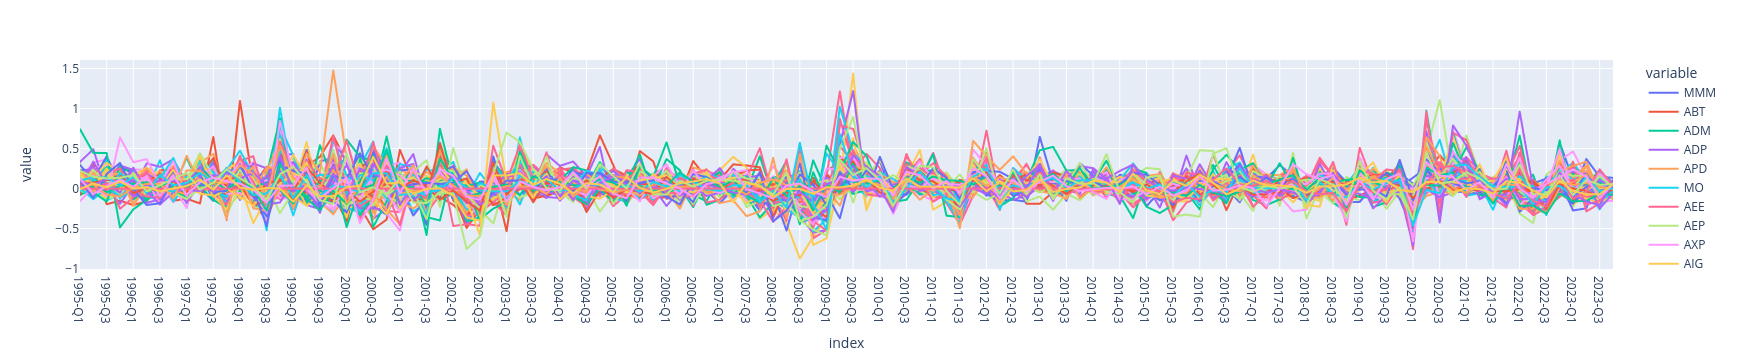

In [104]:
px.line(quarterly_returns_df)

In [101]:
quarterly_returns_df = pd.DataFrame(0, index=quarters_list, columns=companies_throughout)
#quarterly_returns_df

for company in companies_throughout:
    hist = yf.Ticker(company).history(start=start_date)
    for year in quarters:
        for quarter in quarters[year]:
            quarter_start_date = quarters[year][quarter]['start']
            quarter_end_date = quarters[year][quarter]['end']
            try:
                nearest_start_trading_date_index = np.where(np.min(abs(hist.index-quarter_start_date)) == abs(hist.index-quarter_start_date))[0][0]
                nearest_start_trading_date = hist.index[nearest_start_trading_date_index]
    
                nearest_end_trading_date_index = np.where(np.min(abs(hist.index-quarter_end_date)) == abs(hist.index-quarter_end_date))[0][0]
                nearest_end_trading_date = hist.index[nearest_end_trading_date_index]
    
                start_price = float(hist['Close'][nearest_start_trading_date])
                end_price = float(hist['Close'][nearest_end_trading_date])
    
                growth = (end_price - start_price)/start_price
                #print(growth)
                quarterly_returns_df[company][f'{year}-{quarter}'] = growth
            except:
                print(f'{year}-{quarter}', company)
            
            #print(company, quarter, start_price, nearest_start_trading_date, nearest_end_trading_date)

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

1995-Q1 BF.B
1995-Q2 BF.B
1995-Q3 BF.B
1995-Q4 BF.B
1996-Q1 BF.B
1996-Q2 BF.B
1996-Q3 BF.B
1996-Q4 BF.B
1997-Q1 BF.B
1997-Q2 BF.B
1997-Q3 BF.B
1997-Q4 BF.B
1998-Q1 BF.B
1998-Q2 BF.B
1998-Q3 BF.B
1998-Q4 BF.B
1999-Q1 BF.B
1999-Q2 BF.B
1999-Q3 BF.B
1999-Q4 BF.B
2000-Q1 BF.B
2000-Q2 BF.B
2000-Q3 BF.B
2000-Q4 BF.B
2001-Q1 BF.B
2001-Q2 BF.B
2001-Q3 BF.B
2001-Q4 BF.B
2002-Q1 BF.B
2002-Q2 BF.B
2002-Q3 BF.B
2002-Q4 BF.B
2003-Q1 BF.B
2003-Q2 BF.B
2003-Q3 BF.B
2003-Q4 BF.B
2004-Q1 BF.B
2004-Q2 BF.B
2004-Q3 BF.B
2004-Q4 BF.B
2005-Q1 BF.B
2005-Q2 BF.B
2005-Q3 BF.B
2005-Q4 BF.B
2006-Q1 BF.B
2006-Q2 BF.B
2006-Q3 BF.B
2006-Q4 BF.B
2007-Q1 BF.B
2007-Q2 BF.B
2007-Q3 BF.B
2007-Q4 BF.B
2008-Q1 BF.B
2008-Q2 BF.B
2008-Q3 BF.B
2008-Q4 BF.B
2009-Q1 BF.B
2009-Q2 BF.B
2009-Q3 BF.B
2009-Q4 BF.B
2010-Q1 BF.B
2010-Q2 BF.B
2010-Q3 BF.B
2010-Q4 BF.B
2011-Q1 BF.B
2011-Q2 BF.B
2011-Q3 BF.B
2011-Q4 BF.B
2012-Q1 BF.B
2012-Q2 BF.B
2012-Q3 BF.B
2012-Q4 BF.B
2013-Q1 BF.B
2013-Q2 BF.B
2013-Q3 BF.B
2013-Q4 BF.B
2014-Q1 BF.B

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5458/2687568331.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [103]:
quarterly_returns_df.to_csv('./quarterly_returns.csv')